<a href="https://colab.research.google.com/github/mathewspmathew/big_data_pyspark_nyctaxi/blob/main/project_taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
from pyspark.sql.functions import col, to_timestamp,datediff

In [ ]:
spark = SparkSession.builder.appName('taxi').getOrCreate()

In [ ]:
yellow25jan = spark.read.parquet('/content/drive/MyDrive/taxi project/yellow_tripdata_2025-01.parquet',header=True, inferSchema = True)

In [ ]:
yellow25jan.show(5)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|       1| 2025-01-01 00:18:38|  2025-01-01 00:26:59|              1|          1.6|         1|                 N|         229|    

In [ ]:
yellow25jan.columns

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'cbd_congestion_fee']

In [ ]:
yellow25jan.count()

3475226

In [ ]:
yellow_taxi_df = spark.read.parquet("/content/drive/MyDrive/taxi project/yellow_*.parquet", inferSchema = True)


In [ ]:
yellow_taxi_df

DataFrame[VendorID: int, tpep_pickup_datetime: timestamp_ntz, tpep_dropoff_datetime: timestamp_ntz, passenger_count: bigint, trip_distance: double, RatecodeID: bigint, store_and_fwd_flag: string, PULocationID: int, DOLocationID: int, payment_type: bigint, fare_amount: double, extra: double, mta_tax: double, tip_amount: double, tolls_amount: double, improvement_surcharge: double, total_amount: double, congestion_surcharge: double, Airport_fee: double, cbd_congestion_fee: double]

In [ ]:
yellow_taxi_df.count()


11198026

In [ ]:
yellow_taxi_df.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)
 |-- cbd_congestion_fee: double (nullable = true)



In [ ]:
yellow_taxi_df.show(5)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|       1| 2025-03-01 00:17:16|  2025-03-01 00:25:52|              1|          0.9|         1|                 N|         140|    

In [ ]:
from pyspark.sql.functions import col, unix_timestamp, hour, dayofweek, dayofmonth, month, year, round, lit

In [ ]:
yellow_taxi_df = yellow_taxi_df.withColumn("trip_duration_minutes",
                   round((unix_timestamp(col("tpep_dropoff_datetime")) - unix_timestamp(col("tpep_pickup_datetime"))) / 60, 2))


In [ ]:
yellow_taxi_df = yellow_taxi_df.withColumn("picked_hour",hour(col("tpep_pickup_datetime")))
yellow_taxi_df = yellow_taxi_df.withColumn("pickup_day_of_week", dayofweek(col("tpep_pickup_datetime"))) # Sunday = 1, Saturday = 7
yellow_taxi_df = yellow_taxi_df.withColumn("pickup_month", month(col("tpep_pickup_datetime")))
yellow_taxi_df = yellow_taxi_df.withColumn("pickup_year", year(col("tpep_pickup_datetime")))


In [ ]:
yellow_taxi_df = yellow_taxi_df.withColumn("avg_speed_mph",
                   round(col("trip_distance") / (col("trip_duration_minutes") / 60), 2)).na.fill(0, subset=['avg_speed_mph'])

In [ ]:
yellow_taxi_df.show(5)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+---------------------+-----------+------------------+------------+-----------+-------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|trip_duration_minutes|picked_hour|pickup_day_of_week|pickup_month|pickup_year|avg_speed_mph|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------

In [ ]:

print("\nSchema after Feature Engineering:")
yellow_taxi_df.printSchema()


Schema after Feature Engineering:
root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)
 |-- cbd_congestion_fee: double (nullable = true)
 |-- trip_duration_minutes: double (nulla

In [ ]:
yellow_taxi_df.select("tpep_pickup_datetime", "tpep_dropoff_datetime", "trip_duration_minutes", "trip_distance", "avg_speed_mph").show(5)

+--------------------+---------------------+---------------------+-------------+-------------+
|tpep_pickup_datetime|tpep_dropoff_datetime|trip_duration_minutes|trip_distance|avg_speed_mph|
+--------------------+---------------------+---------------------+-------------+-------------+
| 2025-03-01 00:17:16|  2025-03-01 00:25:52|                  8.6|          0.9|         6.28|
| 2025-03-01 00:37:38|  2025-03-01 00:43:51|                 6.22|          0.6|         5.79|
| 2025-03-01 00:24:35|  2025-03-01 00:39:49|                15.23|         1.94|         7.64|
| 2025-03-01 00:56:16|  2025-03-01 01:01:35|                 5.32|         0.95|        10.71|
| 2025-03-01 00:01:44|  2025-03-01 00:10:00|                 8.27|          1.5|        10.88|
+--------------------+---------------------+---------------------+-------------+-------------+
only showing top 5 rows



## **Data Analysis with Spark SQL**

In [ ]:
yellow_taxi_df.createOrReplaceTempView('taxi_trips')

In [ ]:
print('top 10 busiest pickup locations')
spark.sql("""select PULocationID,count(*) as trip_count
from taxi_trips
group by PULocationID
order by trip_count DESC limit 10""").show()

top 10 busiest pickup locations
+------------+----------+
|PULocationID|trip_count|
+------------+----------+
|         161|    513560|
|         237|    491957|
|         236|    456758|
|         132|    433506|
|         230|    377216|
|         186|    365697|
|         162|    360560|
|         142|    332387|
|         234|    312841|
|         170|    303493|
+------------+----------+



In [ ]:
print("Average Fare Amount per Payment Type:")
spark.sql("""select payment_type,avg(fare_amount) from taxi_trips
group by payment_type

 """).show()

Average Fare Amount per Payment Type:
+------------+------------------+
|payment_type|  avg(fare_amount)|
+------------+------------------+
|           0| 15.88277128780659|
|           1| 18.28014870802496|
|           3| 6.688736663634095|
|           2|16.547671394496405|
|           4| 4.204852490683514|
|           5|               0.0|
+------------+------------------+



In [ ]:
print("Total Earnings by Day of Week:")
spark.sql("""
    select pickup_day_of_week, round(SUM(total_amount), 2) as total_earnings
    from taxi_trips
    group by pickup_day_of_week
    order by total_earnings DESC
""").show()


Total Earnings by Day of Week:
+------------------+--------------+
|pickup_day_of_week|total_earnings|
+------------------+--------------+
|                 5| 4.589042865E7|
|                 6| 4.430891304E7|
|                 7| 4.371275757E7|
|                 4| 4.181682593E7|
|                 1| 3.848102633E7|
|                 3| 3.675645689E7|
|                 2| 3.646538527E7|
+------------------+--------------+



In [ ]:
print("Top 5 Longest Trips by Distance:")
spark.sql("""
    select trip_distance, trip_duration_minutes, total_amount, PULocationID, DOLocationID
    from taxi_trips
    order by trip_distance DESC
    limit 5
""").show()

Top 5 Longest Trips by Distance:
+-------------+---------------------+------------+------------+------------+
|trip_distance|trip_duration_minutes|total_amount|PULocationID|DOLocationID|
+-------------+---------------------+------------+------------+------------+
|    320136.29|                  7.0|        2.38|         161|         163|
|    281085.57|                 10.0|       11.48|         215|         130|
|    280125.56|                 20.0|       23.03|         215|         258|
|    276423.57|                  9.0|         5.0|         161|         170|
|    276099.95|                  7.0|       13.88|         224|         233|
+-------------+---------------------+------------+------------+------------+



Building Data Pipelines

In [ ]:
from pyspark.sql.functions import to_date
from pyspark.sql.functions import avg, sum, count, round


In [ ]:
daily_stats_df = yellow_taxi_df.withColumn("pickup_date", to_date(col("tpep_pickup_datetime")))


In [ ]:

daily_summary = daily_stats_df.groupBy("pickup_date") \
    .agg(
        round(avg("trip_distance"), 2).alias("avg_daily_trip_distance"),
        round(sum("total_amount"), 2).alias("total_daily_revenue"),
        count("*").alias("total_daily_trips")
    ) \
    .orderBy("pickup_date")


In [ ]:
print("\nDaily Summary of Trips:")
daily_summary.show()


Daily Summary of Trips:
+-----------+-----------------------+-------------------+-----------------+
|pickup_date|avg_daily_trip_distance|total_daily_revenue|total_daily_trips|
+-----------+-----------------------+-------------------+-----------------+
| 2007-12-05|                    3.0|              22.75|                1|
| 2009-01-01|                  10.77|              70.39|                1|
| 2024-12-31|                   3.66|             589.17|               21|
| 2025-01-01|                   6.43|          2291683.0|            90188|
| 2025-01-02|                   3.68|         2362624.59|            84832|
| 2025-01-03|                    6.0|         2438794.47|            91250|
| 2025-01-04|                   3.24|         2488944.14|            97804|
| 2025-01-05|                   3.82|         2226058.63|            79624|
| 2025-01-06|                    4.4|         2213771.75|            80126|
| 2025-01-07|                   3.43|         2589091.07|      

# Visualizations

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Sample data for plotting daily revenue
daily_revenue_pd = daily_summary.toPandas() # Convert daily summary to Pandas
daily_revenue_pd['pickup_date'] = pd.to_datetime(daily_revenue_pd['pickup_date']) # Ensure date format

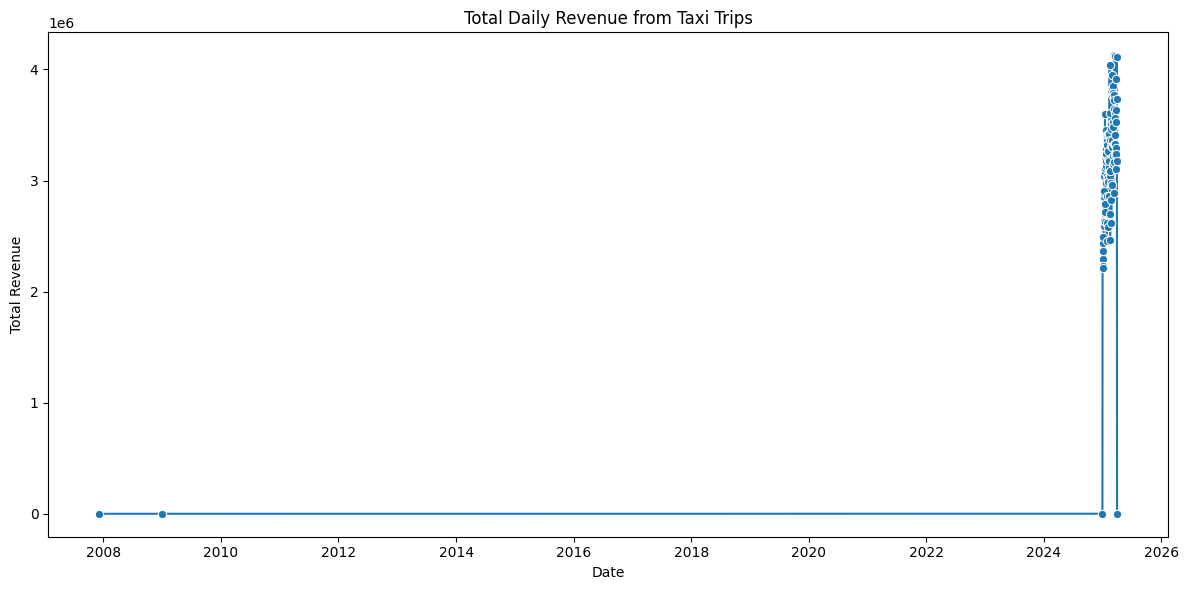

Total Daily Revenue from Taxi Trips


In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_date', y='total_daily_revenue', data=daily_revenue_pd, marker='o')
plt.title('Total Daily Revenue from Taxi Trips')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()
print("Total Daily Revenue from Taxi Trips")

# Saving Results

In [ ]:
daily_summary.write.mode("overwrite").parquet("taxi_daily_summary.parquet")

In [ ]:
spark.stop()

In [ ]:
print("Spark Session stopped.")

Spark Session stopped.
